**Assignment 1, Due 9/26**

## About
In this assignment, you will gain experience implementing a linear model, a neural network, and a deep neural network using TensorFlow 2.0. 

* You will use two different development styles. I thought it’d be helpful for you to see both of these early (if you’re familiar with them, you can branch out to any major framework that exist today). 

* Along the way, you'll add code to visualize the weights of a linear model, and provide your own implementation of softmax (so you learn to extend the built-in functionality right off the bat).

This assignment has several parts, plan ahead and get started early (and come to office hours if you’re stuck, the TAs and I are happy to help). Most concepts will be covered in lecture two, just posting it early.

## Instructions

Complete the code in this notebook by searching for the text **"TODO"**.

## Submission instructions

Please submit this assignment on CourseWorks by uploading a Jupyter notebook that includes saved output. If you are working in Colab, you can prepare your notebook for submission by ensuring that runs end-to-end, then saving and downloading it:

1. ```Runtime -> Restart and run all```
1. ```File -> Save```
1. ```File -> Download.ipynb```

## Resources

You can find all the latest tutorials for TensorFlow 2.0 [here](https://www.tensorflow.org/beta). Code examples that will help you with each part of the assignment are linked below.



---



## Setup

### Install TensorFlow 2.0

If you are running this notebook in Colab, the magic command below will install the most recent version. If you prefer working in Jupyter locally, you will need to install TensorFlow 2.0 on your system, using ```!pip install tensorflow==2.0.0-rc0```.

In [1]:
!pip install tensorflow==2.0.0-rc0

In [0]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

### Check which TF version is installed
TensorFlow 2.0 is currently under development. It's good practice to check which version you have installed. All the code you'll write in this course will be for version 2.0 (currently in beta).

In [2]:
import tensorflow as tf
print(tf.__version__)
assert tf.__version__.startswith('2')

2.0.0-rc0


In [3]:
from tensorflow.keras.layers import Dense, Flatten 
from tensorflow.keras import Model
import matplotlib.pyplot as plt

## Part 1: First steps with Sequential models

You will work with the Sequential API in this section. This is the easiest way to develop models with TF 2.0, and is the most common in practice. 

Here are a few code examples that will help you with this part of the assignment:

* [Get started for beginners](https://www.tensorflow.org/beta/tutorials/quickstart/beginner)
* [Classify images](https://www.tensorflow.org/beta/tutorials/keras/basic_classification)
* [Explore overfitting and underfitting](https://www.tensorflow.org/beta/tutorials/keras/overfit_and_underfit)

### Download and prepare a dataset

In [4]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

### Define, train, and evaluate a linear model

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test);


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.4683 - accuracy: 0.8769
Epoch 2/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.3039 - accuracy: 0.9149
Epoch 3/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.2832 - accuracy: 0.9203
Epoch 4/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2728 - accuracy: 0.9236
Epoch 5/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2668 - accuracy: 0.9253
10000/1 [======================================================================================================================================================================================================================================================================================================================================================================================================================================================

### 1a: Plot loss and accuracy

**TODO**

Modify the code below to produce plots showing loss and accuracy as a function of epochs on training and validation data (it's fine to use x_test and y_test as validation data for this assignment). To do so, you will need to add validation data to the call for ```model.fit```, and capture the results in a history object. Code for plotting is provided for you, you can pass your history object to this.

![Plot 1](https://storage.googleapis.com/applied-dl/im/a1-1.png)
![Plot 2](https://storage.googleapis.com/applied-dl/im/a1-2.png)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.4664 - accuracy: 0.8794 - val_loss: 0.3084 - val_accuracy: 0.9126
Epoch 2/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.3036 - accuracy: 0.9153 - val_loss: 0.2847 - val_accuracy: 0.9199
Epoch 3/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2832 - accuracy: 0.9208 - val_loss: 0.2809 - val_accuracy: 0.9214
Epoch 4/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2731 - accuracy: 0.9234 - val_loss: 0.2694 - val_accuracy: 0.9248
Epoch 5/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2665 - accuracy: 0.9251 - val_loss: 0.2667 - val_accuracy: 0.9255
Epoch 6/10
60000/60000 [==============================] - 2s 42us/sample - loss: 0.2619 - accuracy: 0.9275 - val_loss: 0.2702 - val_accuracy: 0.9240
Epoch 7/10
60000/60000 [==============================] 

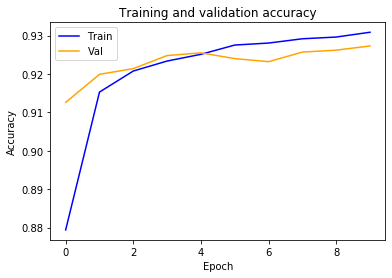

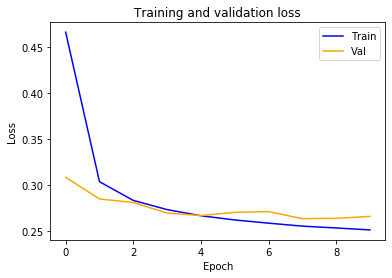

In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data = (x_test, y_test))

# A plotting function you can reuse
def plot(history):
  
  # The history object contains results on the training and test
  # sets for each epoch
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  # Get the number of epochs
  epochs = range(len(acc))

  plt.title('Training and validation accuracy')
  plt.plot(epochs, acc, color='blue', label='Train')
  plt.plot(epochs, val_acc, color='orange', label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  _ = plt.figure()
  plt.title('Training and validation loss')
  plt.plot(epochs, loss, color='blue', label='Train')
  plt.plot(epochs, val_loss, color='orange', label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  
plot(history)

The accuracy reaches highest at epoch 8 in training set, but reaches highest at epoch 4 in validation set. The result of loss shows the similar conclusion. This is an example of variance / bias tradeoff.

### 1b: Implement a neural network 

**TODO**

Modify the code below to create a neural network (with a single hidden layer). Add a Dense layer with 128 units and ReLU activation. Train and evaluate your model. How does the accuracy compare with the linear model above? It is not necessary to produce plots for this section.

In [7]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2572 - accuracy: 0.9268 - val_loss: 0.1374 - val_accuracy: 0.9578
Epoch 2/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.1124 - accuracy: 0.9666 - val_loss: 0.0937 - val_accuracy: 0.9696
Epoch 3/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0767 - accuracy: 0.9763 - val_loss: 0.0774 - val_accuracy: 0.9749
Epoch 4/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0564 - accuracy: 0.9826 - val_loss: 0.0837 - val_accuracy: 0.9747
Epoch 5/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0453 - accuracy: 0.9860 - val_loss: 0.0721 - val_accuracy: 0.9765
Epoch 6/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0346 - accuracy: 0.9890 - val_loss: 0.0723 - val_accuracy: 0.9777
Epoch 7/10
60000/60000 [==============================] 

The validation accuracy of the neural network is 0.9784 after 10 epoches, comparing to 0.9273 in the linear model. Thus, the validation accuracy improved around 5% after switching from linear model to a neural network with one hidden layer.

### 1c: Implement a deep neural network 

**TODO**

Modify the code below to create and train a deep neural network with at least two hidden layers.

I set up a model with three hidden layers.

In [32]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 56us/sample - loss: 0.2676 - accuracy: 0.9233
Epoch 2/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.1115 - accuracy: 0.9664
Epoch 3/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0805 - accuracy: 0.9748
Epoch 4/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0614 - accuracy: 0.9804
Epoch 5/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0473 - accuracy: 0.9845


The training accuracy reaches 0.9845 after 5 epoches.

### 1d: Display predictions and their confidence 

**TODO**

1. Choose one of your models above. Use it to make predictions on the entire test set using ```model.predict```

2. Next, identify one image from the testing set the model classifies correctly, and another that it classifies incorrectly. Add code to display these images below, the correct labels, the predicted labels, and the confidence scores.

1. I choose the model in 1c and use it to make predictions

In [24]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)



Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 58us/sample - loss: 0.2558 - accuracy: 0.9265
Epoch 2/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.1085 - accuracy: 0.9666
Epoch 3/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0745 - accuracy: 0.9780
Epoch 4/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0573 - accuracy: 0.9820
Epoch 5/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0451 - accuracy: 0.9852


In [25]:
y_pred = model.predict(x_test)
y_pred_class = model.predict_classes(x_test)


2. Identify an image from the testing set the model classifies correctly, and another that it classifies incorrectly.

In [26]:
# Write a function to plot the digits
# Show the predicted label, the confidence score and the true label 
# on X axis
def plot_image(i, pred, true_label, img):
  pred, true_label, img = pred, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap="gray")

  pred_label = np.argmax(pred)
 
  plt.xlabel("{} {:.2f} ({})".format(pred_label,
                                np.max(pred),
                                true_label))

# Write a function to display the distribution of the confidence score
# Red bar represents a wrong prediction, blue bar represents a right prediction
def plot_value_array(i, pred, true_label):
  pred, true_label = pred, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), pred, color="#777777")
  plt.ylim([0, 1])
  pred_label = np.argmax(pred)

  thisplot[pred_label].set_color('red')
  thisplot[true_label].set_color('blue')

To plot a digit that incorrectly classified, write a loop to print out the rows that classified wrong.

In [27]:
import numpy as np
# Write a loop to search the rows and store in a array
wrong_id = np.array([])
for i in range(len(x_test)):
    if y_test[i] != y_pred_class[i]:
        wrong_id = np.append(wrong_id, i)
        
wrong_id= wrong_id.astype(int)

Plot one image that incorrectly classified.

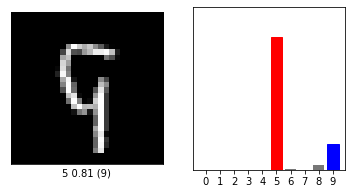

In [28]:
i = wrong_id[0]
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, y_pred[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, y_pred[i],  y_test)
plt.show()

Plot one image that correctly classified.

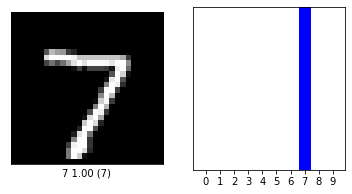

In [29]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, y_pred[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, y_pred[i],  y_test)
plt.show()

Also, plot the confusion matrix for summary.

In [30]:
from sklearn.metrics import confusion_matrix 
import itertools


cm = confusion_matrix(y_test, y_pred_class)

# Write a function to plot the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


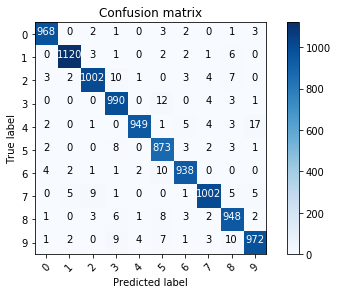

In [31]:
plot_confusion_matrix(cm, classes = range(10))

## Part 2: Subclassed models

In this part of the assignment, you'll work with the Keras Subclassing API. Instead of using a built-in method (```model.fit```) you will train models using a GradientTape.

Here are a few code examples that will help you with this part of the assignment:

* [Get started for experts](https://www.tensorflow.org/beta/tutorials/quickstart/advanced)
* [Tensors and operations](https://www.tensorflow.org/beta/tutorials/eager/basics)
* [Keras overview](https://www.tensorflow.org/beta/guide/keras/overview)

### Download and prepare a dataset
This is similar to the above, except now we'll use ```tf.data``` to batch and shuffle the data, instead of the utilities baked into ```model.fit```. It's not necessary for this assignment, but if you wish, you can learn how to use tf.data [here](https://www.tensorflow.org/beta/tutorials/load_data/images).

In [77]:
# Download a dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Batch and shuffle the data
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train.astype('float32') / 255, y_train)).shuffle(1024).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices(
    (x_test.astype('float32') / 255, y_test)).batch(32)

tf.Tensor(8, shape=(), dtype=uint8)


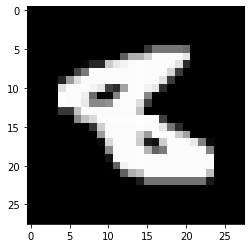

In [78]:
# A quick example of iterating over a dataset object
for image, label in train_ds.take(1):
  plt.imshow(image[0], plt.get_cmap('gray'))
  print(label[0])

### Define and train a linear model

You may see some warnings running the below code (that's okay, just a matter of TF 2.0 being under active development).

In [79]:
class MyLinearModel(Model):
  def __init__(self):
    super(MyLinearModel, self).__init__()
    self.flatten = Flatten()
    self.d1 = Dense(10, activation='softmax', name="dense1")

  def call(self, x):
    x = self.flatten(x)
    return self.d1(x)

In [80]:
model = MyLinearModel()

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

# For each epoch
for epoch in range(5):

  # For each batch of images and labels
  for images, labels in train_ds:

    # Open a GradientTape.
    with tf.GradientTape() as tape:

      # Forward pass
      predictions = model(images)

      # Calculate loss
      loss = loss_fn(labels, predictions)

    # Backprop to calculate gradients
    gradients = tape.gradient(loss, model.trainable_variables)

    # Gradient descent step
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
  print("Epoch {}, Loss: {}".format(epoch, loss))

Epoch 0, Loss: 0.1489357352256775
Epoch 1, Loss: 0.11634999513626099
Epoch 2, Loss: 0.5065410137176514
Epoch 3, Loss: 0.37403008341789246
Epoch 4, Loss: 0.15374234318733215


Note: you may have noticed that the above code runs slowly (it's executing eagerly). Later in this notebook, you will compile your code (to run it in graph mode) using ```@tf.function```. The general workflow is to write your code without using tf.function (as shown above, which makes for easier debugging). Once you've finished debugging your model, you can add ```@tf.function``` for performance if necessary.

### 2a: Visualize the learned weights

We can interpret a linear model by looking at the weights of the fully connected layer. Modify the below code to create a plot similar to the following:

![Plot of weights](https://storage.googleapis.com/applied-dl/im/a1-3.png)

If you find this section tricky, it is not necessary to complete it to continue with the rest of the assignment.


**TODO**

Modify the below code to retrieve the learned weights. You can use either the public API of a model ```model.get_layer(name)``` then retrieve the weights from that, or (because our model is defined using the Subclassing API), you can access the dense layer directly ```model.d1```.

In [37]:
weights, bias = model.get_layer("dense1").get_weights() # get the weights
print(weights.shape)

(784, 10)


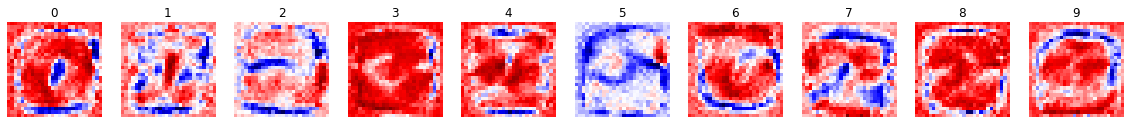

In [38]:
fig, axs = plt.subplots(1,10, figsize=(20,20))
for i in range(10):
  subplot = axs[i]
  subplot.set_title(i)
  subplot.axis('off')
  # Modify me
  i_weights = weights[:,i] # Select the weights for the i'th output
  img = i_weights.reshape(28,28) # Reshape the weights into a 28x28 array
  subplot.imshow(img, plt.get_cmap('seismic'))
plt.show()

### 2b: Implement a deep neural network

**TODO**

Modify this code to create a deep neural network. Train your model using the code below, and compare the accuracy to the linear model above. 

Note: you do not need to modify any sections other than the model definition. 

The code below uses compiled versions of the training and evaluation loops (remove the ```@tf.function``` annotations if you need to debug).

In [87]:
class MyDNN(Model):
  def __init__(self):
    super(MyDNN, self).__init__()
    self.flatten = Flatten()
    # Modify me
    self.d1 = Dense(128, activation = 'relu')
    self.d2 = Dense(64, activation = 'relu')
    self.d3 = Dense(32, activation = 'relu')
    self.d4 = Dense(10, activation='softmax')

  def call(self, x):
    x = self.flatten(x)
    x = self.d1(x)
    x = self.d2(x)
    x = self.d3(x)
    return self.d4(x)

model = MyDNN()

In [88]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

These are helper functions we'll use to record loss and accuracy while your model is trained.

In [89]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

This method trains the model on a batch of data.

In [90]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

This method evaluates the model on a batch of data.

In [91]:
@tf.function
def test_step(images, labels):
  predictions = model(images)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

Training and evaluation loop.

In [92]:
EPOCHS = 5

for epoch in range(EPOCHS):
  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
  print(template.format(epoch+1,
                        train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100))

  # Reset the metrics for the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

Epoch 1, Loss: 0.25356021523475647, Accuracy: 92.57833099365234, Test Loss: 0.1321091204881668, Test Accuracy: 95.86000061035156
Epoch 2, Loss: 0.10661707818508148, Accuracy: 96.79166412353516, Test Loss: 0.10689655691385269, Test Accuracy: 96.77000427246094
Epoch 3, Loss: 0.07546228170394897, Accuracy: 97.65499877929688, Test Loss: 0.10446286201477051, Test Accuracy: 96.94000244140625
Epoch 4, Loss: 0.05745736137032509, Accuracy: 98.24333190917969, Test Loss: 0.09021393954753876, Test Accuracy: 97.56999969482422
Epoch 5, Loss: 0.04694318771362305, Accuracy: 98.49666595458984, Test Loss: 0.1002153530716896, Test Accuracy: 97.27999877929688


Comparing to the loss in the linear model, my DNN decreases the loss from 0.15 to 0.1.

### 2c: Provide your own implementation of softmax and use it to train a model

In your linear model above, the starter code looked similar to: 


```
class LinearModel(Model):
  def __init__(self):
    super(LinearModel, self).__init__()
    self.flatten = Flatten()
    self.d1 = Dense(10, activation='softmax')

  def call(self, x):
    x = self.flatten(x)
    return self.d1(x)
``` 

Now, create a function:


```
def my_softmax(logits):
  # ...
```

and use it in your model as follows:


```
class LinearModel(Model):
  def __init__(self):
    super(LinearModel, self).__init__()
    self.flatten = Flatten()
    self.d1 = Dense(10)

  def call(self, x):
    x = self.flatten(x)
    x = self.d1(x)
    return my_softmax(x)
``` 

Notice, we've removed the built-in activation method on the Dense layer, and added our own to the call method.

Tip: You can implement softmax first using NumPy, if you like, the gradually convert your code to use TensorFlow ops (which begin with tf.\* instead of np.\*).

Notes: 

- Your softmax implementation should be numerically stable. 
- You will need to use tf.* ops in order to use your code to train a model (TF cannot backprop through NumPy operations).

In [69]:
# TODO: your code here
def my_softmax(x): 
    e = tf.math.exp(x)
    s = tf.math.reduce_sum(e, axis=1, keepdims=True)
    return e / s
    

class LinearModel(Model):
  def __init__(self):
    super(LinearModel, self).__init__()
    self.flatten = Flatten()
    self.d1 = Dense(10)

  def call(self, x):
    x = self.flatten(x)
    x = self.d1(x)
    return my_softmax(x)
  
model = LinearModel()

In [70]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()


# For each epoch
for epoch in range(5):

  # For each batch of images and labels
  for images, labels in train_ds:

    # Open a GradientTape.
    with tf.GradientTape() as tape:

      # Forward pass
      predictions = model(images)

      # Calculate loss
      loss = loss_fn(labels, predictions)

    # Backprop to calculate gradients
    gradients = tape.gradient(loss, model.trainable_variables)

    # Gradient descent step
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
  print("Epoch {}, Loss: {}".format(epoch, loss))

Epoch 0, Loss: 0.03951180353760719
Epoch 1, Loss: 0.26596367359161377
Epoch 2, Loss: 0.11775755137205124
Epoch 3, Loss: 0.3113228678703308
Epoch 4, Loss: 0.1159067302942276


The results of loss are similar with the linear model that uses the build in `softmax` function.

References:
1. https://colab.research.google.com/github/tensorflow/docs/blob/r2.0rc/site/en/r2/tutorials/keras/basic_classification.ipynb#scrollTo=2KFnYlcwCaWl
2. https://github.com/keras-team/keras/blob/master/keras/activations.py
